In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
train = pd.read_csv('titanic_train.csv')

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train.drop(['PassengerId', 'Name', 'Ticket'],axis=1,  inplace=True)

In [5]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


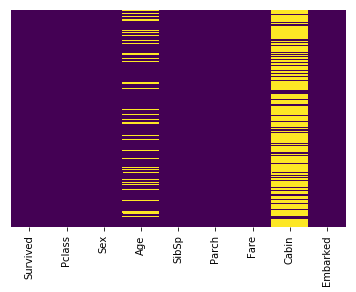

In [6]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False, cmap='viridis')

In [7]:
sns.set_style('whitegrid')

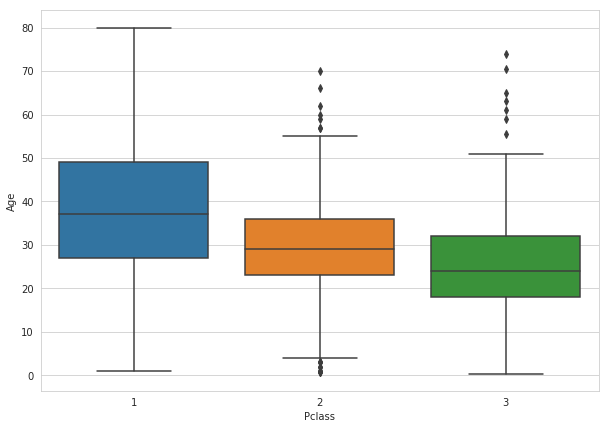

In [8]:
plt.figure(figsize=(10,7))
sns.boxplot(x='Pclass', y='Age', data=train)

In [9]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    
    if pd.isnull(Age):
        if Pclass==1:
            return 37
        elif Pclass==2:
            return 29
        else:
            return 24
    else:
        return Age

In [10]:
train['Age'] = train[['Age', 'Pclass']].apply(impute_age, axis=1)

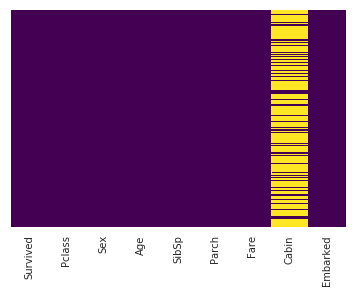

In [11]:
sns.heatmap(train.isnull(), cbar=False, yticklabels=False, cmap='viridis')

In [12]:
train.drop(['Cabin'], axis=1, inplace=True)

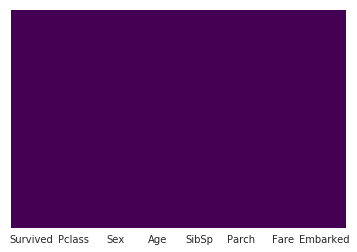

In [13]:
sns.heatmap(train.isnull(), cbar=False, yticklabels=False, cmap='viridis')

In [14]:
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [15]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [16]:
sex = pd.get_dummies(train['Sex'], drop_first=True)

In [17]:
embark = pd.get_dummies(train['Embarked'], drop_first=True)

In [18]:
train = pd.concat([train, sex, embark],axis=1)

In [19]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,male,Q,S
0,0,3,male,22.0,1,0,7.2500,S,1,0,1
1,1,1,female,38.0,1,0,71.2833,C,0,0,0
2,1,3,female,26.0,0,0,7.9250,S,0,0,1
3,1,1,female,35.0,1,0,53.1000,S,0,0,1
4,0,3,male,35.0,0,0,8.0500,S,1,0,1


In [20]:
train.drop(['Sex', 'Embarked'],axis=1,inplace=True)

In [21]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


PREPARING TEST DATA

In [22]:
test = pd.read_csv('titanic_test.csv')

In [23]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [24]:
test.drop(['Cabin', 'Name', 'Ticket', 'PassengerId'],axis=1, inplace=True)

In [25]:
test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S


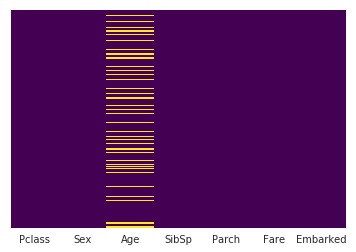

In [26]:
sns.heatmap(test.isnull(), cbar=False, yticklabels=False,cmap='viridis')

In [27]:
test['Age'] = test[['Age', 'Pclass']].apply(impute_age, axis=1)

In [28]:
sex = pd.get_dummies(test['Sex'], drop_first=True)

In [29]:
embark = pd.get_dummies(test['Embarked'], drop_first=True)

In [30]:
test = pd.concat([test, sex, embark ],axis=1)

In [31]:
test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,male,Q,S
0,3,male,34.5,0,0,7.8292,Q,1,1,0
1,3,female,47.0,1,0,7.0000,S,0,0,1
2,2,male,62.0,0,0,9.6875,Q,1,1,0
3,3,male,27.0,0,0,8.6625,S,1,0,1
4,3,female,22.0,1,1,12.2875,S,0,0,1


In [32]:
test.drop(['Sex', 'Embarked'],axis=1,inplace=True)

In [33]:
test.head(2)

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,3,34.5,0,0,7.8292,1,1,0
1,3,47.0,1,0,7.0000,0,0,1


In [34]:
train.head(2)

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0


CREATING AND TESTTING A LOGISTIC REGRESSION

In [35]:
from sklearn.model_selection import train_test_split

In [59]:
X = train[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'male', 'Q',
       'S']]
y = train['Survived']

In [60]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=101)

In [61]:
from sklearn.linear_model import LogisticRegression

In [62]:
logmodel = LogisticRegression()

In [63]:
logmodel.fit(X_train, y_train)

/home/harshal/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [64]:
predictions = logmodel.predict(X_test)

In [65]:
from sklearn.metrics import classification_report

In [66]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.77      0.86      0.81       154
           1       0.78      0.65      0.71       114

    accuracy                           0.77       268
   macro avg       0.77      0.76      0.76       268
weighted avg       0.77      0.77      0.77       268



In [67]:
from sklearn.metrics import confusion_matrix

In [68]:
confusion_matrix(y_test, predictions)

array([[133,  21],
       [ 40,  74]])